In [4]:
import pandas as pd
from pandas import DataFrame
import os
import calendar
from pretty_html_table import build_table
import sys
import json
from pandas import json_normalize

#
# Read in file with user request for monthly data
#

colNames = ['Rainfall', 'High', 'Low', 'Year', 'Month', 'Day']
df = pd.read_json('/Users/jameshayes/monthly.txt')
print(df)
html_table_blue_light = build_table(df, 'blue_light')

with open('/Users/jameshayes/monthlyTable.html', 'w') as f:
    f.write(html_table_blue_light)

#
# Get month name from the month number and year
#

xd = (df.loc[df['Month']].values[0])
sd = (df.loc[df['Month']].values[0])

month_num = int(xd[5])
month_name = calendar.month_name[month_num]
year = int(sd[4])
print(year)

    index  Rain  HiTemp  LowTemp  Year  Month  Day
0   12878  0.00    51.3     33.0  2021     12    1
1   12879  0.00    62.0     43.2  2021     12    2
2   12880  0.00    53.1     36.3  2021     12    3
3   12881  0.00    47.5     36.1  2021     12    4
4   12882  0.00    51.0     28.2  2021     12    5
5   12883  0.28    61.7     44.7  2021     12    6
6   12884  0.00    44.3     33.1  2021     12    7
7   12885  0.00    40.8     30.6  2021     12    8
8   12886  0.00    40.5     26.7  2021     12    9
9   12887  0.01    51.9     27.5  2021     12   10
10  12888  0.16    63.9     43.4  2021     12   11
11  12889  0.00    55.3     35.1  2021     12   12
12  12890  0.00    54.5     33.9  2021     12   13
13  12891  0.00    55.5     34.3  2021     12   14
14  12892  0.00    57.0     33.3  2021     12   15
15  12893  0.00    65.7     52.2  2021     12   16
16  12894  0.00    60.7     45.9  2021     12   17
17  12895  0.12    50.0     39.9  2021     12   18
18  12896  0.01    50.0     28.

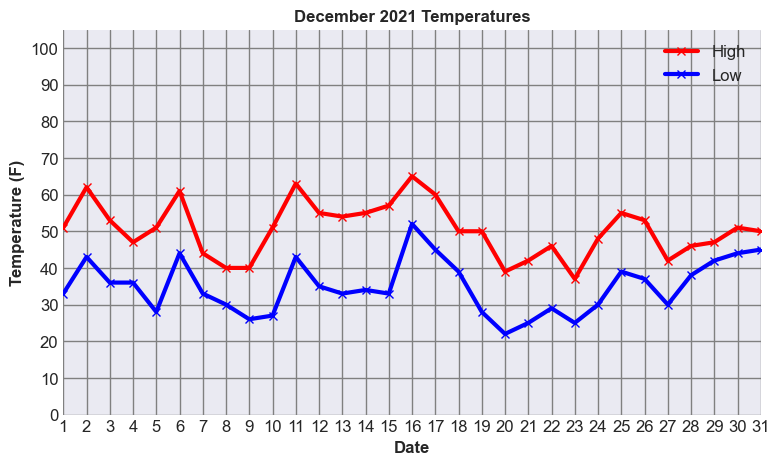

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

df['Day'] = df['Day'].astype(int)
df['High'] = df['HiTemp'].astype(int)
df['Low'] = df['LowTemp'].astype(int)
    
HI = df['High']
LO = df['Low']
DAY = df['Day']

y = HI.to_numpy()
y1 = LO.to_numpy()
x = DAY.to_numpy()
            
plt.style.use('seaborn-v0_8-dark')
    
#path1 = '/Users/jameshayes/'
path1 = '/var/www/html/000/'
plt.figure(figsize= (9,5))
plt.locator_params(axis = 'x', nbins = 31)
plt.xlim(1,31)
plt.ylim(0, 105)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')
plt.yticks(fontsize=12)
plt.ylabel('Temperature (F)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {year} Temperatures', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')   
plt.plot(x, y, marker = "x", color = "red", linewidth =3, label ="High")
plt.plot(x, y1, marker = "x", color = "blue", linewidth =3, label ="Low")
plt.legend(fontsize = 12)
#plt.savefig(f'{path1}monthlyTemps_db')
plt.show()

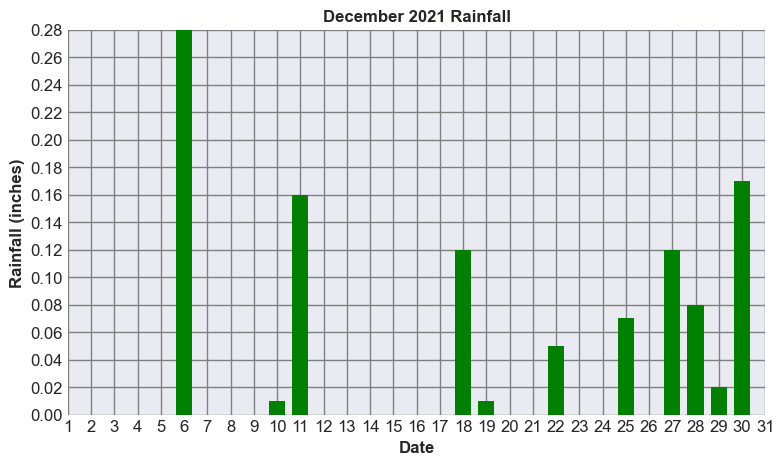

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import datetime

path1 = '/var/www/html/000/'

df['Day'] = df['Day'].astype(int)
df['Rainfall'] = df['Rain'].astype(float)
    
RAINFALL = df['Rainfall']
DAY = df['Day']

y = RAINFALL.to_numpy()
x = DAY.to_numpy()

plt.style.use('seaborn-v0_8-dark')
    
plt.figure(figsize= (9,5))
plt.locator_params(axis = 'x', nbins = 31)
plt.xlim(1, 31)
plt.xticks(fontsize=12)
plt.xlabel('Date', fontsize=12, fontweight ='bold')
plt.yticks(fontsize=12)
plt.ylabel('Rainfall (inches)', fontsize=12, fontweight ='bold')
plt.locator_params(axis='y', nbins=20)
plt.title(f'{month_name} {year} Rainfall', fontsize=12, fontweight ='bold')
plt.grid(axis = "y", linewidth = 1.0, color = 'gray')
plt.grid(axis = "x", linewidth = 1.0, color = 'gray')


plt.bar(df['Day'], df['Rain'], color ='green', width = 0.7)
plt.autoscale(enable = True, axis = 'y', tight = True)
#plt.legend(fontsize = 12)
#plt.savefig(f'{path1}monthlyRain_db')
plt.show()